# Q1 An analysis on the Robert Lalonde study "Evaluating the Econometric Evaluations of Training Programs with Experimental Data"

First of all, welcome everybody! In this notebook our discussion on the study of Robert Lalonde "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986) is presented. 

Enjoy your journey!

Let's start by importing the usual libraries and the dataset:

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Load dataset
df = pd.read_csv('lalonde.csv')
df.head(5)

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


## 1.1 A naive analysis

Let's first split the dataset into the treatment group and the control group, and have a closer look at the corresponding data:

In [2]:
treat_df = df[df.treat == 1]
treat_df.describe()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,185.0,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,1.0,25.816216,10.345946,0.843243,0.059459,0.189189,0.708108,2095.573689,1532.055314,6349.143530
std,0.0,7.155019,2.010650,0.364558,0.237124,0.392722,0.455867,4886.620353,3219.250870,7867.402218
min,1.0,17.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,20.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,485.229800
50%,1.0,25.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4232.309000
75%,1.0,29.000000,12.000000,1.000000,0.000000,0.000000,1.000000,1291.468000,1817.284000,9642.999000
max,1.0,48.000000,16.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000


In [3]:
control_df = df[df.treat == 0]
control_df.describe()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,429.0,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,0.0,28.030303,10.235431,0.202797,0.142191,0.512821,0.596737,5619.236506,2466.484443,6984.169742
std,0.0,10.786653,2.855238,0.402552,0.349654,0.500419,0.491126,6788.750796,3291.996183,7294.161791
min,0.0,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,19.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,220.181300
50%,0.0,25.000000,11.000000,0.000000,0.000000,1.000000,1.000000,2547.047000,1086.726000,4975.505000
75%,0.0,35.000000,12.000000,0.000000,0.000000,1.000000,1.000000,9277.128000,3881.419000,11688.820000
max,0.0,55.000000,18.000000,1.000000,1.000000,1.000000,1.000000,25862.320000,18347.230000,25564.670000


We notice that the two groups "treat" and "control" differ a lot in term of average income in '74 before the treatment:
* mean of income in '74 for subjects that took part in the training program = **2095.57**
* mean of income in '74 for subjects that didn't take part in the training program = **5619.23**

in order to correctly study the effectiveness of the treatment and to correctly compare the two groups we'll use the folling quantity:

$income\_increase = re78 - re74$

In other words, we'll compare the _increase of salary_ for the two groups, and not just the salary measured in '78, as suggested in the assignment. In our opinion this makes much more sense, since the two groups in this dataset are definetly unequal under this paramenter. In the article of Robert LaLonde "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986) this is not done, and just the salaries of '78 are compared. This because it is clearly stated that:
**"the mean earnings of the AFDC treatments and the AFDC controls in the year before training differ by 2 dollars, the mean age of the two groups differ by 3 months, and the mean years of schooling are identical. None of the differences between the treatment's and control's characteristics, hours, and earnings are statistically significant"**. 
LaLonde uses different groups in his study, made by 297 individuals (treatment group) and 425 individuals (control group). **However, in the dataset used in this work the two groups differ considerably in terms of salary before the treatment.** It seems that we just have a simplified dataset of 185 individuals in the treatment group and 429 individuals in the control group. This is why we used the $income\_increase$ as a metric, instead of the raw salary in '78. 


Let's now investigate better the difference between these two groups.


## First naïve visualization of the data:
here we visualize the distribution of the $income\_increase$ for the two groups:
* we visualize the distributions of the increase of income on the same graph for the two groups;
* we visualize two boxplots of the two distributions already plotted to get a better understanding of the data

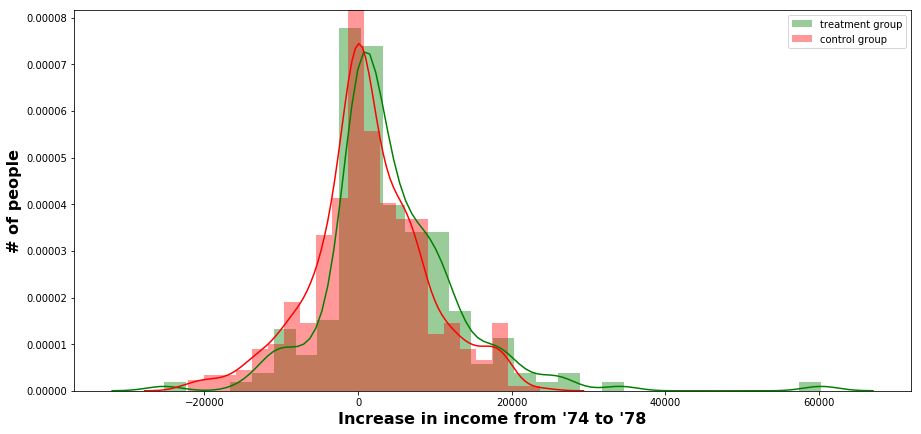

In [4]:
### OBTAINING THE INCOME_INCREASE FOR THE TWO GROUPS
income_increase_treatment = treat_df.re78-treat_df.re74
income_increase_control = control_df.re78-control_df.re74

### VISUALIZING THE DISTRIBUTIONS
f,ax = plt.subplots(figsize=(15,7))
# plotting the distribution of the income increase for treatment group
sns.distplot(income_increase_treatment, kde=True, color="g",ax = ax, label = 'treatment group')
ax.set_ylabel('# of people', fontsize=16).set_weight('bold')
ax.set_xlabel('Increase in income from \'74 to \'78', fontsize=16).set_weight('bold')
# plotting the distribution of the income increase for control group
sns.distplot(income_increase_control, kde=True, color="r",ax = ax, label = 'control group')
ax.legend()

We can see that the distribution for the people that took part in the program (in green) is **clearly shifted to the right** suggesting a clear effectiveness of the training program! Let's visualize the boxplots of the two distributions to get a better understanding.



Summary of the income_increase for the treatment group:


Skew: 1.58435185542
count      185.000000
mean      4253.569842
std       8926.985184
min     -25256.802700
25%          0.000000
50%       2456.153000
75%       8173.908000
max      60307.930000
dtype: float64


Summary of the income_increase for the control group:


Skew: 0.0132062740685
count      429.000000
mean      1364.933236
std       7460.046942
min     -22198.490000
25%      -2447.939600
50%        243.390000
75%       5551.819000
max      23764.800000
dtype: float64


(-23308.414500000003, 24953.040000000001)

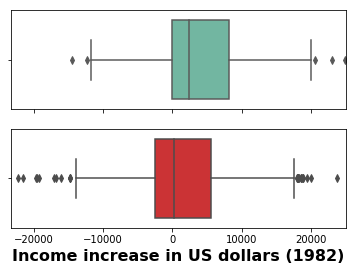

In [5]:
# Stats for people who participated on the training program
print('\n\nSummary of the income_increase for the treatment group:')
print('\n\nSkew:', income_increase_treatment.skew())
print(income_increase_treatment.describe())

f, ax = plt.subplots(2, sharex=True)
# Visualisation of the distribution with a boxplot
maxvalue = np.max(income_increase_treatment) * 1.05
minvalue = np.min(income_increase_treatment) * 1.05
sns.boxplot(x=income_increase_treatment, palette="Set2", ax = ax[0])
plt.xlim(minvalue, maxvalue)

# Stats for people who don't participated to the training program
print('\n\nSummary of the income_increase for the control group:')
print('\n\nSkew:', income_increase_control.skew())
print(income_increase_control.describe())
maxvalue = np.max(income_increase_control) * 1.05
minvalue = np.min(income_increase_control) * 1.05
sns.boxplot(x=income_increase_control, palette="Set1", ax = ax[1])
ax[1].set_xlabel('Income increase in US dollars (1982)', fontsize=16).set_weight('bold')
plt.xlim(minvalue, maxvalue)

#f.tight_layout()

With this naïve analysis, it can be concluded that the mean income increase change a lot with the training programs!

Let's try to be a bit more quantitative by looking a bit closer to the data:
- Treatment group $income\_increase$:
    * mean: 4253.14
    * std\_dev: 8926.98
- Control group $income\_increase$:
    * mean: 1364.93
    * std\_dev: 7460.04
 
Since the difference between the means is comparable with the standad deviation of the two groups, we expect that the statistical hypothesis test (not done here since it's not the purpose of this homework) could give evidence for an actual difference between the populations of control and treatment groups. The naïve researcher could then immediately conclude that the trainig program is really effective!

## 1.2) A closer look to the data

We're not naive, of course, so for each feature in the dataset, we compare its distribution in the treated group with its distribution in the control group.

#### Plot helper functions

In [6]:
# Plot helper functions
def value_barplot_label(plot_name):
    # Inserts the value label on the top of each bar.

    for p in plot_name.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height,'{:0.0f}'.format(height), ha="center").set_weight('bold')

def tick_format(plot,tick_type):
    if tick_type == 1:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)
            label.set_rotation(90)
            
        for label in plot.get_yticklabels():
            label.set_fontsize(14)
        
    if tick_type == 2:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)

        for label in plot.get_yticklabels():
            label.set_fontsize(14)

def value_counts_plot(feature, title, xlabel, ylabel):
    # Visualize how many universitie sper country are there in the best 200 ranking
    plt.figure(figsize=(7,5))
    ax = sns.barplot(x=df[feature].value_counts().index, y=df[feature].value_counts())
    plt.title(title, fontsize=25).set_weight('bold')
    tick_format(ax, 2)
    value_barplot_label(ax)
    ax.set_ylabel(ylabel, fontsize=16).set_weight('bold')
    ax.set_xlabel(xlabel, fontsize=16).set_weight('bold')
    
def plots(df,treat_df,control_df):
    
    # SIZE OF GROUPS 
    f, ax = plt.subplots(figsize=(7,7))
    sns.barplot(x=df.treat.value_counts().index, y=df.treat.value_counts(), ax = ax)
    plt.title("Size of groups", fontsize=25).set_weight('bold')
    #tick_format(ax, 2)
    #value_barplot_label(ax)
    ax.set_ylabel('number on people', fontsize=16).set_weight('bold')
    ax.set_xlabel('0: control group, 1: treated group', fontsize=16).set_weight('bold')


    ### AGE
    treat_age = treat_df.age
    control_age = control_df.age

    f, ax = plt.subplots(figsize=(15,7))
    sns.distplot(treat_age, kde=True, color="g", ax = ax, label = 'treatment group')
    ax.set_ylabel('% of people', fontsize=16).set_weight('bold')
    ax.set_xlabel('Income', fontsize=16).set_weight('bold')
    sns.distplot(control_age, kde=True, color="r", ax = ax, label = 'control group')
    plt.title("Age distribution", fontsize=25).set_weight('bold')
    ax.legend()

    ### EDUCATION
    treat_educ = treat_df.educ
    control_educ = control_df.educ

    f, ax = plt.subplots(figsize=(15,7))
    sns.distplot(treat_educ, kde=True, color="g", ax = ax, label = 'treatment group')
    ax.set_ylabel('% of people', fontsize=16).set_weight('bold')
    sns.distplot(control_educ, kde=True, color="r", ax = ax, label = 'control group')
    plt.title("Years of education", fontsize=25).set_weight('bold')
    ax.set_xlabel('Years of Education', fontsize=16).set_weight('bold')
    ax.legend()

    ### RACE
    treat_sums = treat_df.treat.groupby(treat_df.race).count()
    control_sums = control_df.treat.groupby(control_df.race).count()
    
    plt.figure(figsize = (15,7))
    labels = 'White', 'Black', 'Hispanic'
    the_grid = plt.GridSpec(1, 2)
    plt.subplot(the_grid[0, 0], aspect=1)
    plt.pie(treat_sums, labels=labels, autopct='%1.1f%%', shadow=False)
    plt.title('Treatment group', fontsize=16).set_weight('bold')
    plt.subplot(the_grid[0, 1], aspect=1)
    plt.pie(control_sums, labels=labels, autopct='%1.1f%%', shadow=False)
    plt.title('Control group', fontsize=16).set_weight('bold')

    ### MARRIED
    treat_sums = treat_df.treat.groupby(treat_df.married).count()
    control_sums = control_df.treat.groupby(control_df.married).count()

    plt.figure(figsize = (15,7))
    labels = 'Not Married', 'Married'
    the_grid = plt.GridSpec(1, 2)
    plt.subplot(the_grid[0, 0], aspect=1)
    plt.pie(treat_sums, labels=labels, autopct='%1.1f%%', shadow=False)
    plt.title('Treatment group', fontsize=16).set_weight('bold')
    plt.subplot(the_grid[0, 1], aspect=1)
    plt.pie(control_sums, labels=labels, autopct='%1.1f%%', shadow=False)
    plt.title('Control group', fontsize=16).set_weight('bold')

    ### DEGREE
    treat_sums = treat_df.treat.groupby(treat_df.nodegree).sum()
    control_sums = control_df.treat.groupby(control_df.nodegree).count()
    
    plt.figure(figsize = (15,7))
    labels = 'No degree', 'Degree'
    the_grid = plt.GridSpec(1, 2)
    plt.subplot(the_grid[0, 0], aspect=1)
    plt.pie(treat_sums, labels=labels, autopct='%1.1f%%', shadow=False)
    plt.title('Treatment group', fontsize=16).set_weight('bold')
    plt.subplot(the_grid[0, 1], aspect=1)
    plt.pie(control_sums, labels=labels, autopct='%1.1f%%', shadow=False)
    plt.title('Control group', fontsize=16).set_weight('bold')



# adding a new column on the dataframe: df['race']
# 0 if white
# 1 if black
# 2 if hispanic
df['race'] = (df.black == 1) + 2*(df.hispan == 1)
treat_df['race'] = (treat_df.black == 1) + 2*(treat_df.hispan == 1)
control_df['race'] = (control_df.black == 1) + 2*(control_df.hispan == 1)

/home/zampieri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/zampieri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Let's plot!

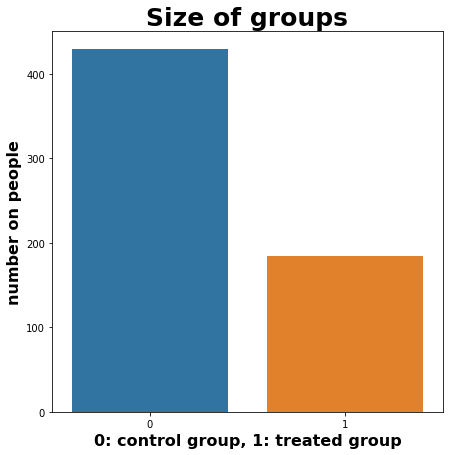

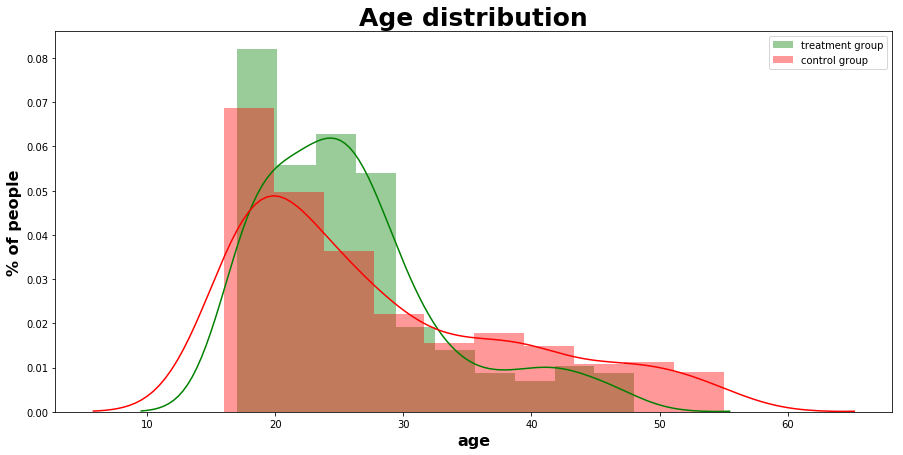

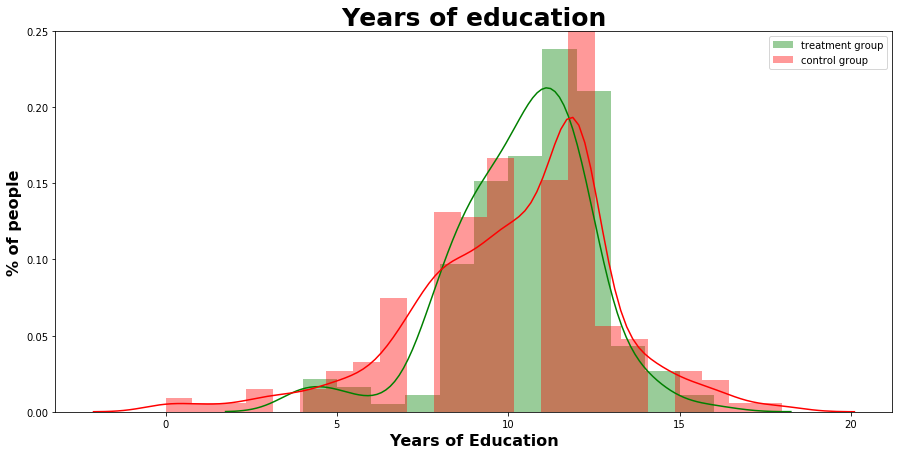

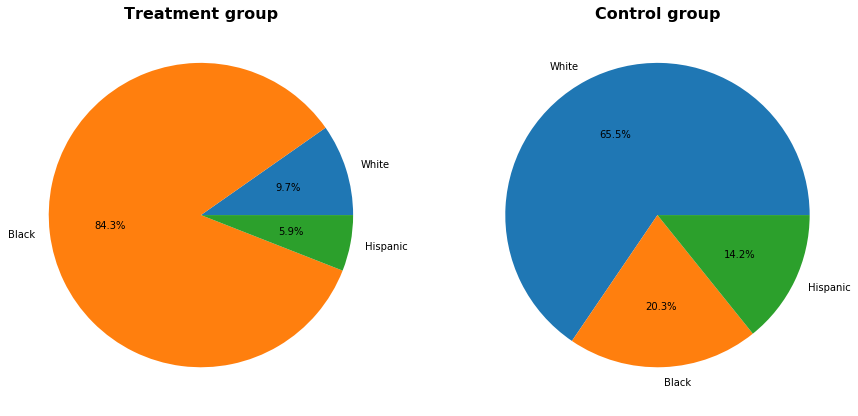

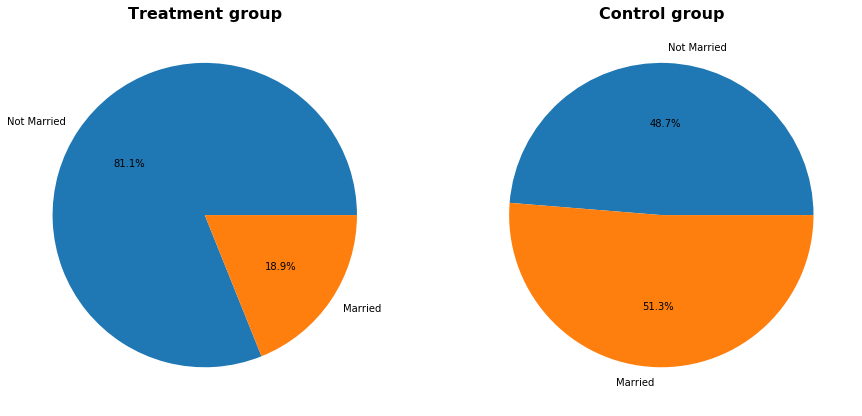

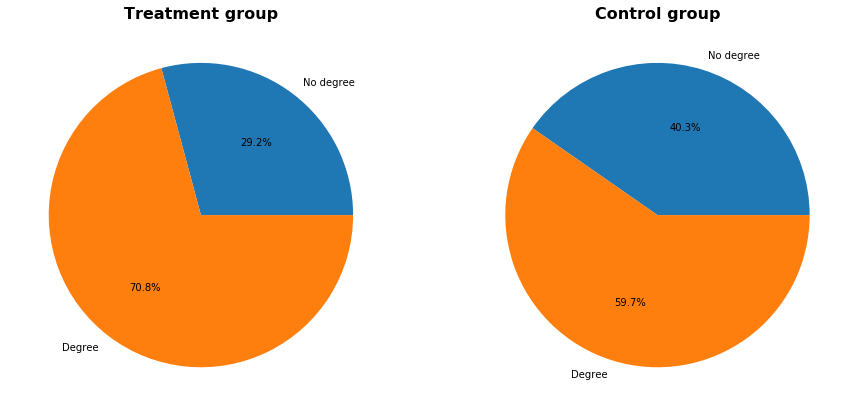

In [7]:
plots(df,treat_df,control_df)

We immediately notice that the groups differ a lot by race and by marriage, while have similar distrbutions of the other variables. Since in the USA of the '70s **we assume that the race is a fundamental factor for what concerns the salary, we can't accept the results coming from a comparison between such different groups. We need a smarter and fairer way to match treatment and control.**


For now, let's just implement a simple propensity score matching algorithm.


## propensity score matching algorithm
Let's then define and fit a logistic regressor on our treatment and control groups. The probabilities given by this regressor will then be used to _find a subset of the original control group that better match the treatment group._ To find this subset, we'll minimize the sum of the differences of propensity score matches. Such matching problem is vastly studied in literature and is known as a **linear assignment problem**. By using a suitable bipartite graph where the nodes represent the individuals of the two groups connected by arches whose cost is the difference of propensity scores, the problem can be easily converted (by a slight modification of the graph) to a **maximum flow problem**. The algorithm to solve this problem is implemented in different libraries; in this work **we used the algorithm implemented in Scipy (basic library that comes with Numpy)**. 

In [8]:
# Import ML library
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, classification_report

# Build a regressor
logistic = linear_model.LogisticRegression()

# Create feature matrix and prediction vector
feature_cols = ['age', 'educ', 'race', 'married', 'nodegree','re74','re75','re78']
X = df[feature_cols]
y = df.treat
# train it
logistic.fit(X, y)
# calculate propensity score and orrensponding prediciton
propensity_score=logistic.predict_proba(X)[:,1]
y_pred = logistic.predict(X)
### adding to our dataframe the propensity score for each individual and the correspondent prevision
df['prediction']= y_pred
df['propensity score']= propensity_score

df.head(2)

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,race,prediction,propensity score
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.046,1,0,0.270691
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.894,2,1,0.719408


In [9]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.83      0.80       429
          1       0.52      0.43      0.47       185

avg / total       0.69      0.71      0.70       614



Thanks to this report, we see that our model fits better the control group (0.71 of accuracy) while has some problem fitting the treatment group (0.38 of accuracy). Let's then use the propensity score obtained to perform the matching described above.

In the function match(treat_df, control_df) does the following things:
- extracts the propensity scores of treatment and control groups
- build the cost matrix $X$ of the corresponding bipartite graph for the linear assignment problem. Such matrix $X$ is build so that 
$X(i,j) = (propensity\ score\ of\ the\ i_{th}\ person\ in\ the\ treatment\ group\ -\ propensity\ score\ of\ the\ j_{th}\ person\ in\ the\ control\ group)$
- finds the indices of the matched treatment and control group and store them in the variables treat_ind, control_ind.
- return 4 dataframes:
    - the new control_df
    - the new treat_df
    - a merged dataframe where on a single row we have the two individuals coming form treatment and control group that have been matched. In this way we can manually check how the match has been done.
    - a concatenated dataframe that contains the union of the new control_df and the new treat_df. This will be useful to easily extract information about the two groups as a whole.


In [10]:
from scipy.optimize import linear_sum_assignment

control_df = df[df['treat']==0].reset_index(drop=True)
treat_df = df[df['treat']==1].reset_index(drop=True)

def match(treat_df, control_df):
    
    # we store in prop1, prop2 the vectors of the propensity scorse of the two groups
    prop1 = treat_df['propensity score']
    prop0 = control_df['propensity score']
    
    # BUILDING THE COST MATRIX OF THE BIPARTITE GRAPH
    cost = np.array([np.abs(p-prop0) for p in prop1])
    
    # SOLVING THE LINEAR ASSIGNMENT PROBLEM AND OBTAIN THE DESIRED MATCHES!
    treat_ind, control_ind = linear_sum_assignment(cost)
    
    # we extract the matched people from treatment and control group
    matched_treat_df = treat_df.loc[treat_ind]
    matched_control_df = control_df.loc[control_ind]
    # we add a new feature to the treatment: the ID of the matched person in the control group
    matched_treat_df['matched control ID']=control_ind
    # we merge the dataframe, to have the data of the matched people on the same row!
    merged_df = pd.merge(matched_treat_df, matched_control_df,left_on='matched control ID', right_index=True,\
                        suffixes=('_treatment', '_control'))
    
    # we creae the new feature 'RESULTS OF TREATMENT'
    merged_df['RESULT OF TREATMENT']=(merged_df.re78_treatment-merged_df.re74_treatment)-\
                                     (merged_df.re78_control-merged_df.re74_control)
    # we create the concatenated dataframe with the matched control and treatment group
    concat_df = pd.concat([matched_treat_df, matched_control_df])
    
    return matched_treat_df,matched_control_df, merged_df, concat_df

### LET'S MATCH
new_treat_df, new_control_df, matched_df, new_df = match(treat_df, control_df)


Oh yeah! Let's first manually check how the match has been carried out:

In [11]:
print('\n\nThe sum of absolute values of differences between propensity scores of matched individuals is:')
print(abs(matched_df['propensity score_treatment']-matched_df['propensity score_control']).sum())
matched_df[['id_treatment','propensity score_treatment','id_control','propensity score_control']].head()



The sum of absolute values of differences between propensity scores of matched individuals is:
7.358976283633339


,id_treatment,propensity score_treatment,id_control,propensity score_control
0,NSW1,0.270691,PSID395,0.269940
1,NSW2,0.719408,PSID348,0.719593
2,NSW3,0.549716,PSID341,0.706606
3,NSW4,0.496826,PSID422,0.308569
4,NSW5,0.498392,PSID383,0.306194


The matched individuals have really similar propensity scores! The sum of 185 differences is only $4.66$, so the mean difference is $0.02$. Nice! However, this is a pure mathematical value, that doesn't have much sense if not supported by the visualization of the distribution of the feature between the new treatment and control groups. Let's go for the visualization then!

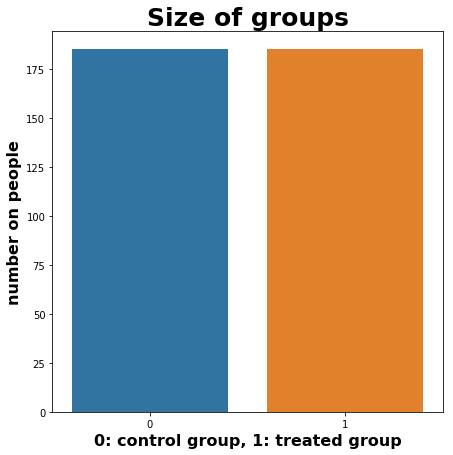

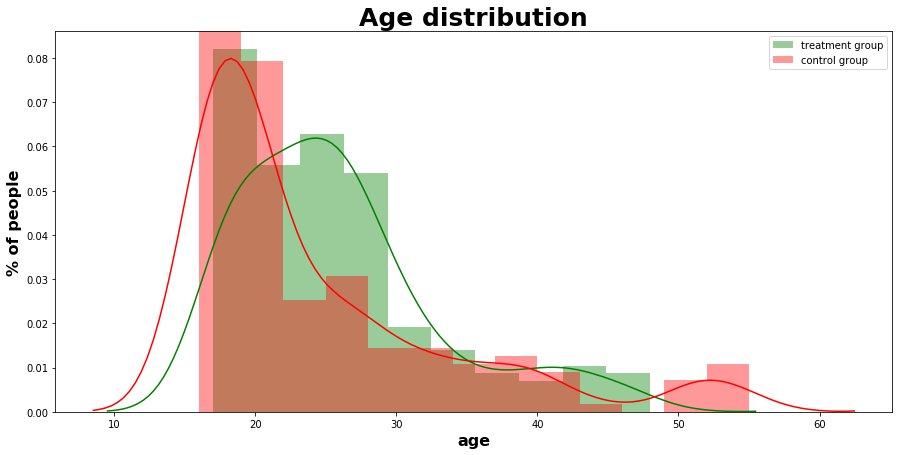

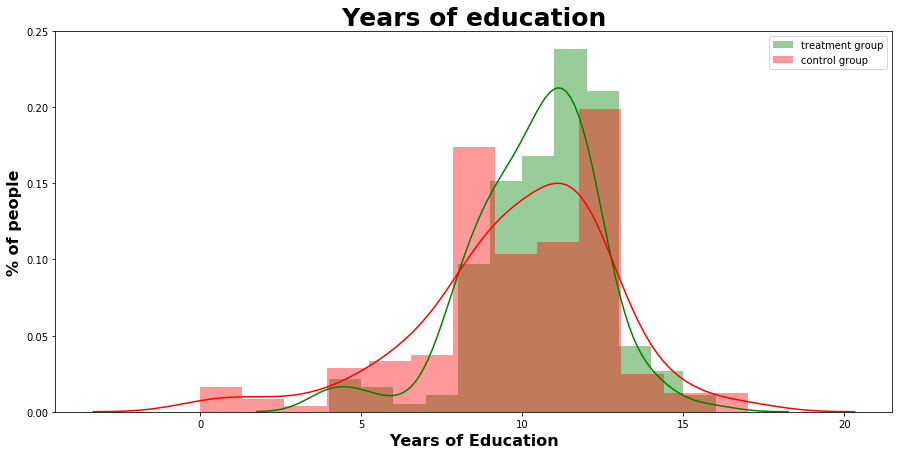

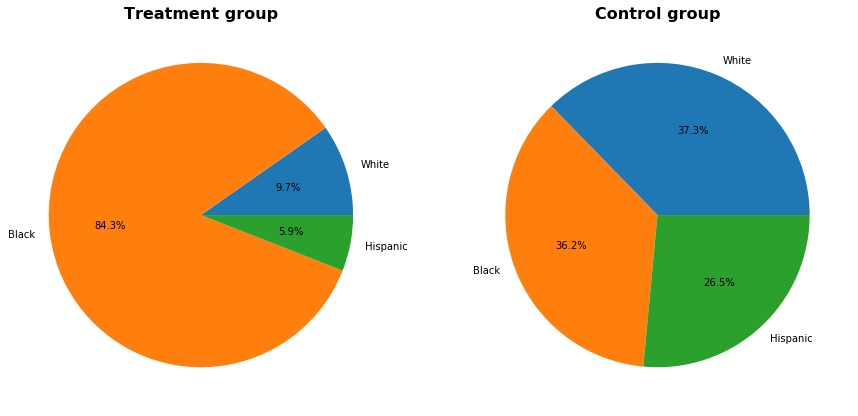

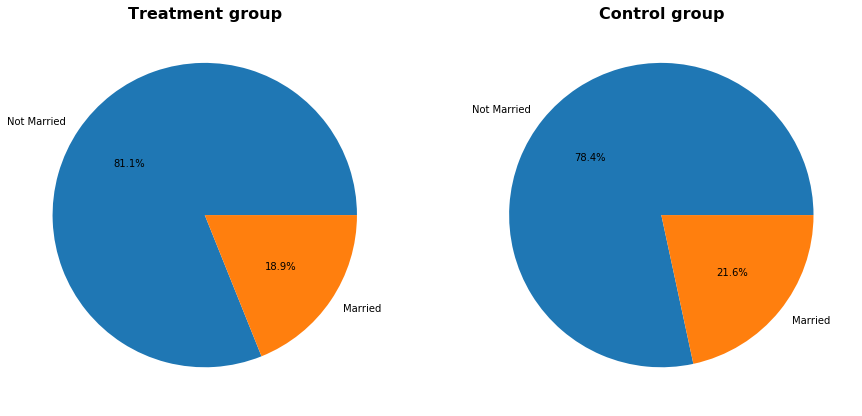

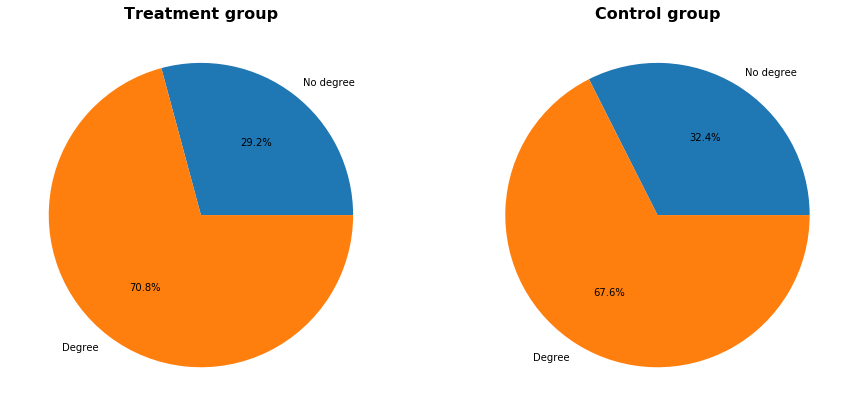

In [12]:
plots(new_df,new_treat_df,new_control_df)

From these graphs we can see that the propensity score algorithm created a control group with, compared to the treatment group, has:
- the same size (of course)
- almost the same distribution of people with a degree
- a much closer distribution of people married
- a closer (but still very different) distibution of people of different races.

Since we think that the race plays a determinant role in the job market of the USA of the $'70_s$, we are still not very satisfied with this control group. Anyway, let's visualize the new results of $income\_increase$ with this choice of control group to see what can we conclude:


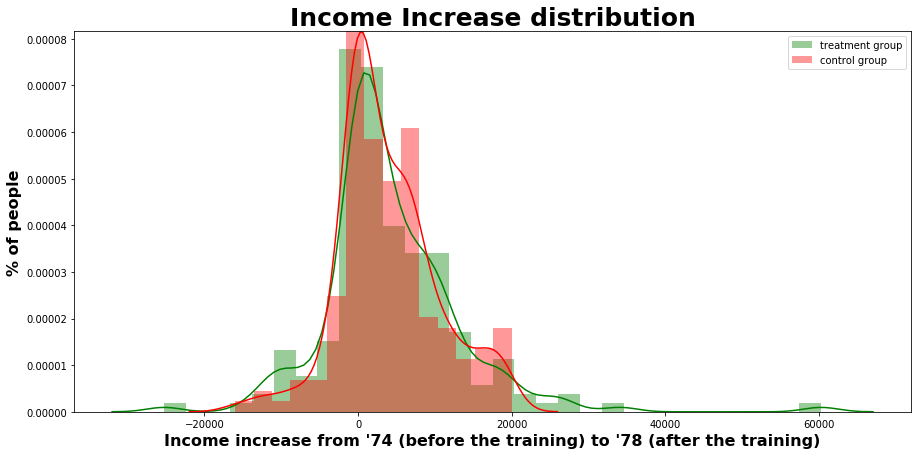

In [13]:
# Visualizing distributions
income_increase_treat = new_treat_df.re78-new_treat_df.re74
income_increase_control = new_control_df.re78 - new_control_df.re74

f, ax = plt.subplots(figsize=(15,7))
sns.distplot(income_increase_treat, kde=True, color="g", ax = ax, label = 'treatment group')
ax.set_ylabel('% of people', fontsize=16).set_weight('bold')
ax.set_xlabel('Income increase from \'74 (before the training) to \'78 (after the training)', fontsize=16).set_weight('bold')
sns.distplot(income_increase_control, kde=True, color="r", ax = ax, label = 'control group')
plt.title("Income Increase distribution", fontsize=25).set_weight('bold')
ax.legend()

We can now see how **the shift in the distribution of treatment $income\_increase$ observed in the naïve analysis has disappeared!** From this different analysis we could then conclude that the training program is not so effective. But let's go even deeper in the matching procedure, and let's try to balance our groups basing on the race feature.

## Matching the groups even further.

In the code hereunder we simply:
- split the treatment and control groups by race
- apply the matching algorithm above between corresponding groups

However, _this time we'll obtain smaller treatment and control groups_ since in the control groups there are less black people (87) that in the treatment group (156) as visualized in the following barplots: 

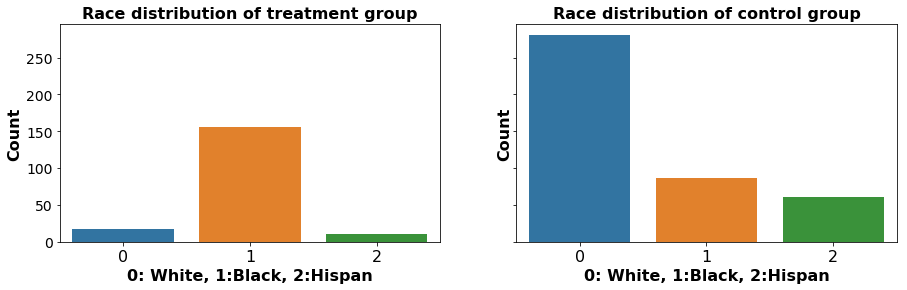

In [14]:
f, ax = plt.subplots(1,2,figsize=(15,4), sharey = True)
sns.barplot(x=treat_df.race.value_counts().index, y=treat_df.race.value_counts(), ax = ax[0])
ax[0].set_title("Race distribution of treatment group", fontsize=16).set_weight('bold')
tick_format(ax[0], 2)
#value_barplot_label(ax[0])
ax[0].set_ylabel('Count', fontsize=16).set_weight('bold')
ax[0].set_xlabel('0: White, 1:Black, 2:Hispan', fontsize=16).set_weight('bold')

sns.barplot(x=control_df.race.value_counts().index, y=control_df.race.value_counts(), ax = ax[1])
ax[1].set_title("Race distribution of control group", fontsize=16).set_weight('bold')
tick_format(ax[1], 2)
#value_barplot_label(ax[0])
ax[1].set_ylabel('Count', fontsize=16).set_weight('bold')
ax[1].set_xlabel('0: White, 1:Black, 2:Hispan', fontsize=16).set_weight('bold')

So, _the algorithm won't be able to match all black people in the treatment group_. Keeping this in mind, we proceed with the algorithm:

In [15]:
### SEPARATING TREATMENT GROUPS BY RACE
treat_white_df = treat_df[treat_df.race==0].reset_index(drop=True)
treat_black_df = treat_df[treat_df.race==1].reset_index(drop=True)
treat_hispanic_df = treat_df[treat_df.race==2].reset_index(drop=True)
### SEPARATING CONTROL GROUPS BY RACE
control_white_df = control_df[control_df.race==0].reset_index(drop=True)
control_black_df = control_df[control_df.race==1].reset_index(drop=True)
control_hispanic_df = control_df[control_df.race==2].reset_index(drop=True)

### PROPENSITY SCORE MATCHING FOR EVERY RACE
treat_white_df, control_white_df, merged_white_df, concat_white_df = match(treat_white_df, control_white_df)
treat_black_df, control_black_df, merged_black_df, concat_black_df = match(treat_black_df, control_black_df)
treat_hispanic_df, control_hispanic_df, merged_hispanic_df, concat_hispanic_df = match(treat_hispanic_df, control_hispanic_df)

### CONCATENATING THE RESULTS INTO THE USUAL UNIQUE DATAFRAMES:
newnew_treat_df = pd.concat([treat_white_df,treat_black_df,treat_hispanic_df])
newnew_control_df = pd.concat([control_white_df,control_black_df,control_hispanic_df])
newnew_df = pd.concat([newnew_treat_df,newnew_control_df])
merged_df = pd.concat([merged_white_df,merged_black_df,merged_hispanic_df])

Let's visualize the usual plots to understand the new composition of the treatment and control groups:

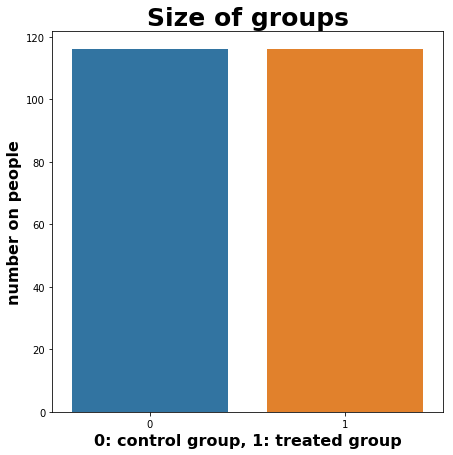

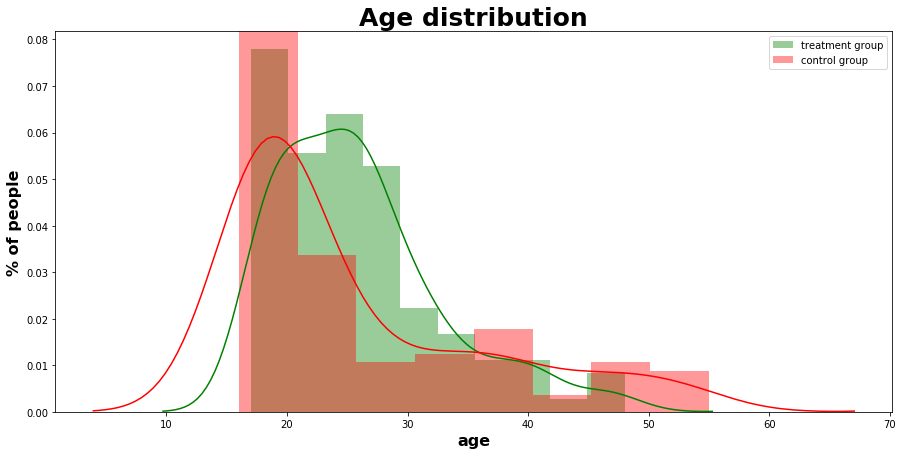

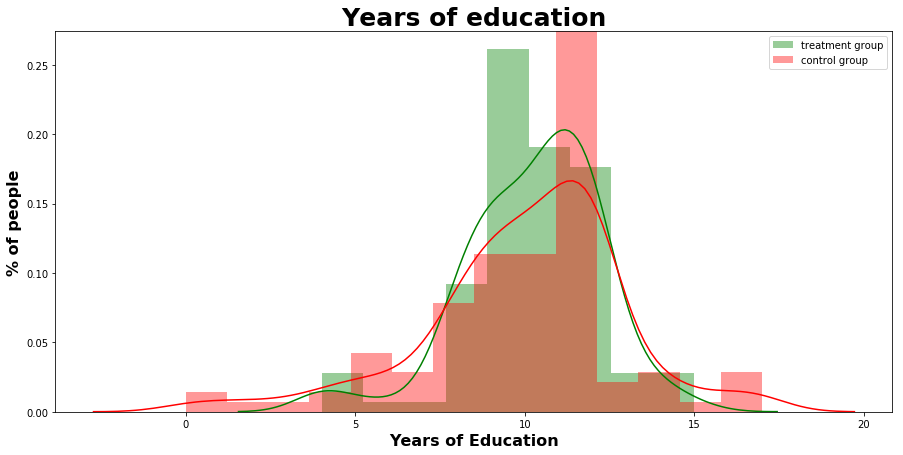

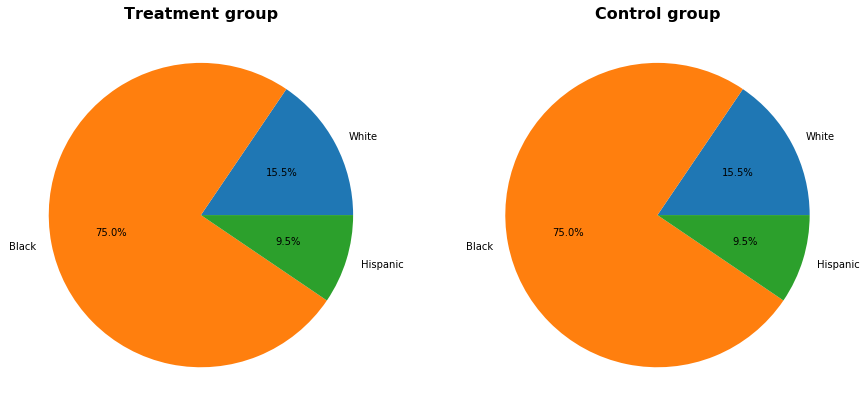

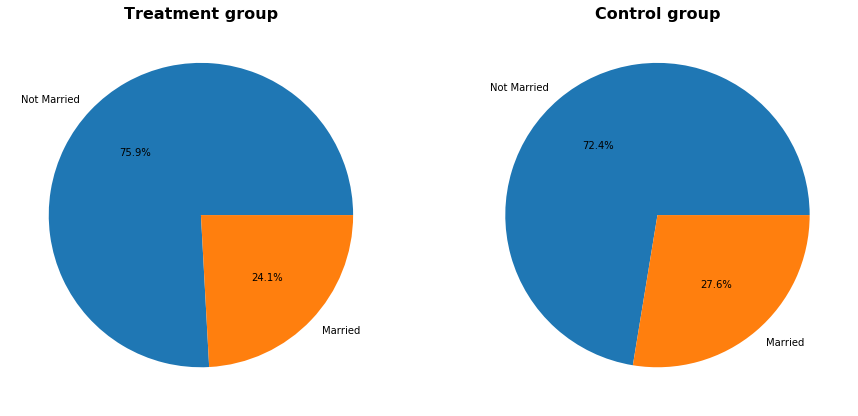

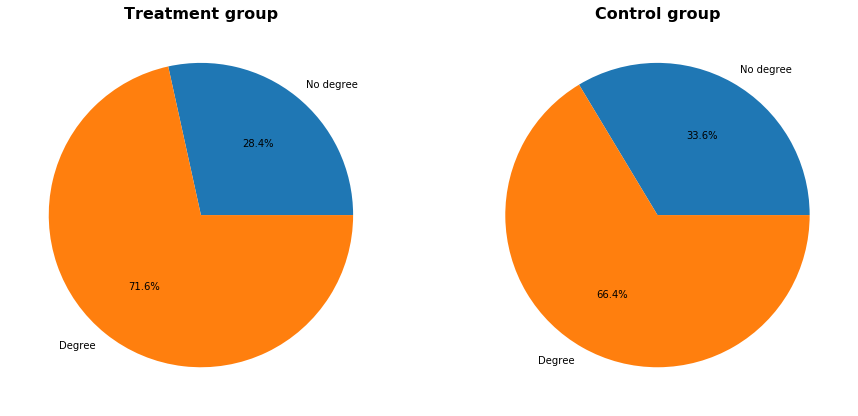

In [16]:
plots(newnew_df,newnew_treat_df,newnew_control_df)

We can appreciate how:
- Treatment and control groups are now smaller (as predicted and already explained)
- the distribution of race is the same (by construction of the groups)
- the distibutions of 'Years of Education' and 'Age' are extremely similar
- the distribution of 'degree' and 'married' are still extremely similar, but a bit more different if compared to the ones obtained with the previous naive propensity score matching. However, the better distribution of the key factor 'race' definitly compensate this slight difference.

**We are now satisfied with the matching of treatment and control groups!** Let's now draw our conclusions:

## The less naive analysis

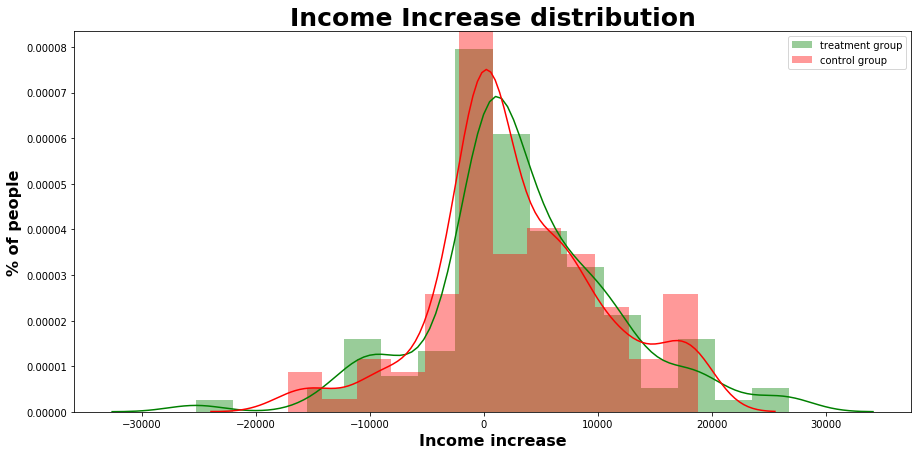

In [17]:
# Visualizing distributions
income_increase_treated = newnew_treat_df.re78-newnew_treat_df.re74
income_increase_control = newnew_control_df.re78-newnew_control_df.re74


f, ax = plt.subplots(figsize=(15,7))
sns.distplot(income_increase_treated, kde=True, color="g", ax = ax, label = 'treatment group')
ax.set_ylabel('% of people', fontsize=16).set_weight('bold')
ax.set_xlabel('Income increase', fontsize=16).set_weight('bold')
sns.distplot(income_increase_control, kde=True, color="r", ax = ax, label = 'control group')
plt.title("Income Increase distribution", fontsize=25).set_weight('bold')
ax.legend()

We can now see that **the shift observed in the naïve analysis that had disappeared in the propensity score matching has now appeared again!** Let's be more quantitative and plot the _difference between the income increase of treatment and control group_ as a boxplot, plus printing all the information about this distribution.



difference between the income increase of treatment and control group:


count      116.000000
mean       403.785126
std       8365.889480
min     -19875.409000
25%      -4692.518000
50%          0.000000
75%       5089.463250
max      26207.078600
Name: RESULT OF TREATMENT, dtype: float64


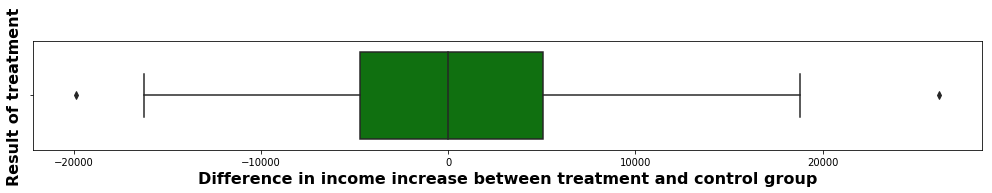

In [18]:
print('\n\ndifference between the income increase of treatment and control group:\n\n')
print(merged_df['RESULT OF TREATMENT'].describe())
plt.figure(figsize=(17,2))
ax1 = sns.boxplot(merged_df['RESULT OF TREATMENT'], color="g")
ax1.set_ylabel('Result of treatment', fontsize=16).set_weight('bold')
ax1.set_xlabel('Difference in income increase between treatment and control group', fontsize=16).set_weight('bold')

We can appreciate that:

- the mean of 1049\$ is small, but definitely significant if compared to the std. dev. of 8176\$
- this is validated also by the positive median of 566$

Let's now perform a common t-test to quantify at best the difference between the two distributions.
"A two-sample t-test investigates whether the means of two independent data samples differ from one another. In a two-sample test, the null hypothesis is that the means of both groups are the same" [Two-Sample T-Test](http://hamelg.blogspot.ch/2015/11/python-for-data-analysis-part-24.html)


In [19]:
import scipy.stats as stats
stats.ttest_ind(a= income_increase_treated,
                b= income_increase_control,
                equal_var=False)

Ttest_indResult(statistic=0.39353126018394918, pvalue=0.69429530244370818)

The test yields a p-value of 0.2999, which means there is a 30% chance we'd see sample data this far apart if the two groups tested are actually identical. **This chance is actually very big!!** If we were using a 95% confidence level we would fail to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 5%.

## CONCLUSIONS:

- This study is highly sensitive on the matching procedure. Different choices lead to different data and different conclusions. Further analysis and accurately designed experiments are needed to draw more confident conclusions.
- From our assumptions (the race is a key factor in the job market of the USA of the '70) we can see a difference between the treatment and the control group distributions of income increase between '74 and '78. However, from the t-test above, we conclude that

_**There's no statistical evidence to affirm that the two populations of treatment and control groups are different. So, we can't say the training program is actually effective**_

# 2. Applied ML

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project if you plan to work with text!

1. Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency–inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).

2. Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.



## 2.1 Load dataset and vectorize

A classifier of news is going to be built to assign 20 news categories. Let's import the useful libraries and the dataset:

In [20]:
# Import libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from pprint import pprint
from time import time
import itertools
from pandas.io.json import json_normalize
from pathlib import Path 
import os 
import pickle

In [21]:
# Import dataset
newsgroups = fetch_20newsgroups(subset='all')#, remove = ('headers', 'footers', 'quotes'))

# Show categories list
pprint(list(newsgroups.target_names))
classes = newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


Let's check the dataset shape and how is like each datapoint:

In [22]:
# The real data lies in the filenames and target attributes(target category)
print('Filenames shape:', newsgroups.filenames.shape)
print('Target shape:',newsgroups.target.shape,'\n')

# Show 
print('The categories of newsgroups are: ',list(pd.DataFrame.from_dict(json_normalize(newsgroups), orient='columns').columns),'\n')
print('description is: ',newsgroups.description)
print('filenames contains the location of the files in the hardware running the code ')

Filenames shape: (18846,)
Target shape: (18846,) 

The categories of newsgroups are:  ['DESCR', 'data', 'description', 'filenames', 'target', 'target_names'] 

description is:  the 20 newsgroups by date dataset
filenames contains the location of the files in the hardware running the code 


Now, the data is vectorized. The following condierations have been taken in account:
* Small `max_feature` is faster and reduces a bit the chances of overfitting
* If word in `max_d` portion of the files, then it get ignored
* Strip eventual accents (even though we should not have problems with english)
* For this current version we can only eliminate "english" key word, even though it should already be taken by max_df

In [23]:
# Vectorize the text dataset
vectorizer = TfidfVectorizer(max_features=10000,\
                             max_df=0.7,\
                             strip_accents = 'ascii',
                             stop_words='english')
vectors = vectorizer.fit_transform(newsgroups.data)
vectors.shape

(18846, 10000)

### Split in training, testing and validation sets

First, the predictors matrix and the predicted variable are created. Then the split is done as follows:
- Training: 80%
- Testing: 10%
- Validation: 10% 

In [24]:
# Create predictors and predicted variable
X = vectors
y = newsgroups.target

# Split training, testing and validation tests
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=0, train_size=0.5)

/home/zampieri/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


The classifier, in this case the Random Forest classifier can be created and fitted:

## 2.2 Train a Random Forest classifier

In order to classify the different news categories, a Random Forest classifier is choosen.

### 2.2.1 A first simple random tree

In [25]:
# Select the seed used in this homework
seed = 50

# Create a fit the classifier
rfc = RandomForestClassifier(random_state=seed)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

#### _Print helper class_

In [26]:
# To print with different fonts
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

Lets see the results of this first try:

In [27]:
# First Evaluation
print (color.BOLD + 'Initial score:' + color.END)
print('Train score:',rfc.score(X_train, y_train))
print('Test score:',rfc.score(X_test, y_test))
print('Validation score:',color.RED+str(rfc.score(X_val, y_val))+color.END)

Initial score:
Train score: 0.996285486867
Test score: 0.769230769231
Validation score: 0.757029177719


It can be seen that there is a huge difference between the train score and the test and validation scores. This is mainly due to the overfit of the classifier on the training set.

Let's investigate the main attributes of the classifier:

In [28]:
# Print main attributes of the classifier
print('Number of features:',rfc.n_features_)
print('Features importances:',rfc.feature_importances_)
print('Maximal importance of a feature:',max(rfc.feature_importances_))
depths = pd.Series([estimator.tree_.max_depth for estimator in rfc.estimators_])
print ('\nDepths: \n',depths.describe())

Number of features: 10000
Features importances: [  2.40415905e-04   1.59533191e-04   2.06049517e-04 ...,   0.00000000e+00
   8.79586375e-05   1.01147172e-05]
Maximal importance of a feature: 0.0110403044133

Depths: 
 count     10.000000
mean     315.400000
std       34.992698
min      273.000000
25%      285.500000
50%      316.500000
75%      337.750000
max      382.000000
dtype: float64


It can be observed that the maximal feature importance is a 1% of all features importances. This means that our data can be badly explained in the different dimensions. In a further analysis, PCA could be implemented in order to increase the feature importance and reduce the dimensionality. 

Watching at the max depth statistical description of all estimators will help us to know how to tune better this parameter.

### 2.2.2 Grid search for finding better parameters
In order to find the best possible parameters for our classifier, a grid search on the number of estiamotors and the maximum depth of each estimator. 

**NOTE**: Since the computation are long, we are gonna save the results in pickle files. We used them to write to a binary file the content of a given variable, in our case it will be the content of grid search. The goal being to not recompute the results each time. We saved all thoses _.pickle_ files in the subdirectory **pickles/**

#### _Helper functions to save the models_

In [29]:
DATA_FOLDER = 'pickles/'

# function to save results in a pickle file
def save_results(var_name, file_name):
    file_path = DATA_FOLDER + file_name +'.pickle'
    my_file = Path(file_path)
    my_dir = Path(DATA_FOLDER)
    if not(my_dir.is_dir()):
        os.makedirs(DATA_FOLDER)
        save_results(var_name, file_name)
    elif my_file.is_file():
        print('WARNING! This filename already exusted so we wrote in "overrided.pickle" PLEASE MANUALLY CHANGE THE NAME'+\
             '\n CHancge the file name with your name')
        with open(DATA_FOLDER + 'overrided.pickle', 'wb') as file:
            pickle.dump(var_name, file)
    else:
        with open(file_path, 'wb') as file:
            pickle.dump(var_name, file)

# Function to read the pickles file
def read_pickle(file_name):
    file_path = DATA_FOLDER + str(file_name) + '.pickle'
    with open(file_path, "rb") as file:
        out = pickle.load(file)
    return out

# function to prin the scores
def print_scores(grid_search_var):
    print('Train score:',grid_search_var.score(X_train, y_train))
    print('Test score:',grid_search_var.score(X_test, y_test))
    print('Validation score:',color.RED+str(grid_search_var.score(X_val, y_val))+color.END)
    
# since in the following we will change the max number of features, here is a function that does exactly that
def change_max_features_number(max_features,max_df=0.7):
    newsgroups = fetch_20newsgroups(subset='all')
    classes = newsgroups.target_names
    vectorizer = TfidfVectorizer(max_features=max_features,\
                                 max_df=max_df,\
                                 strip_accents = 'ascii',
                                 stop_words='english')
    vectors = vectorizer.fit_transform(newsgroups.data)
    # Create predictors and predicted variable
    X = vectors
    y = newsgroups.target

    # Split training, testing and validation tests
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8) # 80% train
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=0, train_size=0.5) # 10% test, 10% validation
    return X_train, y_train, X_test, X_val, y_test, y_val

**NOTE:** The pickle file have not been uploaded on github due to their size. Do not esitate to ask one of the collaborators for the pickle files.

#### _Template code_

For computation cost reasons, this code has been runned in different computers for different cases. The code used to grid-search on the parameters is the following:

``` python
# Parameters of the grid search
n_estim_range = [200, 400, 700] # an example of possible range used for the number of estimators
max_depth_range = [50, 100, 200, 500, 600, 900] # an example of possible range used for the maximum depth

# grid on which the grid search will be done
paramgrid = {'n_estimators': n_estim_range,'max_depth': max_depth_range} 

# Grid search on the number of estimators
grid_search = GridSearchCV(RandomForestClassifier(random_state=seed), paramgrid, cv = 3)
grid_search.fit(X_train, y_train)
#print the best found parameters
print('Best parameters:',grid_search.best_params_)

# Evaluate the results to measure our efficiency
print('Train score:',grid_search.score(X_train, y_train))
print('Test score:',grid_search.score(X_test, y_test))
print('Validation score:',grid_search.score(X_val, y_val))
```

In order to save the model parameters in a pickle file (here "pickle_file_1"), the following code has been used:
>``` python
save_results(grid_search, 'pickle_file_1')
```

### 2.2.2.1 First approach: Run removing headers, footers and quotes

The data has been imported removing headers, footers and quotes. Let's investigate if that can influence on a bad fitting of our classifier. <br/>
To do that we re-feth the dataset (fast), removing the headers, footers and quotes and we re-split everything in train, test and validation sets. 

In [30]:
# Import dataset
newsgroups = fetch_20newsgroups(subset='all',remove = ('headers', 'footers', 'quotes'))
classes = newsgroups.target_names
vectorizer = TfidfVectorizer(max_features=10000,\
                             max_df=0.7,\
                             strip_accents = 'ascii',
                             stop_words='english')
vectors = vectorizer.fit_transform(newsgroups.data)

# Create predictors and predicted variable
X = vectors
y = newsgroups.target

# Split training, testing and validation tests
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8) # 80% train
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=0, train_size=0.5) # 10% test, 10% validation

/home/zampieri/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Now we load one of our pickle files where we did the grid search and take a look at the results. The ranges of the grid search have been printed below:

In [31]:
removed_features_GS = read_pickle('removing_features_1')

print('Run with "remove = ("headers", "footers", "quotes")" and with the following set of parameters:\n'+\
      'n_estim_range = [200, 400, 700]\n'+\
      'max_depth_range = [50, 100, 200, 500, 600, 900]\n')

print('Optimal features found: ',removed_features_GS.best_params_)
print('which gave the following results:')
# Evaluation
print_scores(removed_features_GS) 

Run with "remove = ("headers", "footers", "quotes")" and with the following set of parameters:
n_estim_range = [200, 400, 700]
max_depth_range = [50, 100, 200, 500, 600, 900]

Optimal features found:  {'max_depth': 500, 'n_estimators': 400}
which gave the following results:
Train score: 0.971875829132
Test score: 0.663129973475
Validation score: 0.640848806366


**Discussion:** We can see that removing the headers, footers and quotes decreases our accuracy of preditcion, even if it is in some sense a more thruthfull classification since only the content is analysed. <br />
**Thus in the rest of the analysis we thus not remove the features, but we should keep in mind that it may not be representative of the reality**<br />
Finally, we recompute the training and tests sets without removing the headers, footers and quotes for the following 

### 2.2.2.2 second approach: considerations about number of estimators and tree depth


We reload the dataset taking also headers, footers and quotes into account as previously stated:

In [32]:
X_train, y_train, X_test, X_val, y_test, y_val = change_max_features_number(10000)

/home/zampieri/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


A first run: <br />
(we cannot reload the pickle file for incompatibilities of this particular file so we hard-coded the results. For the other runs we will be able to load the pickle files.)

In [33]:
# results with file gilcompa.pickle
print('Run with without removing anything and with the following set of parameters:\n'+\
      'n_estim_range = [ 316  464  681 1000]\n'+\
      'max_depth_range = [ 1000  2154  4641 10000]\n')

print('We found:\n'+\
      'best n_estimators = 1000\n'+\
     'best max_depth = 1000\n'+\
     'train score = 1.0\n'+\
     'test_score = 0.841909814324\n'+\
     'val_score = 0.835013262599')

Run with without removing anything and with the following set of parameters:
n_estim_range = [ 316  464  681 1000]
max_depth_range = [ 1000  2154  4641 10000]

We found:
best n_estimators = 1000
best max_depth = 1000
train score = 1.0
test_score = 0.841909814324
val_score = 0.835013262599


**Discussion:** It seems that the bigger the number of estimators the better. On the other hand, a smaller max_depth would be preferable since it causes overfitting.  The overfitting (1.0 on the training set and 0.84 on the test) is very important.

We reduce both ranges a do another run:

In [34]:
nightly_run_2 = read_pickle('martino')
# print ranges and coditions of run
print('Run with the following set of parameters:\n'+\
      'max_depth_range = [300, 500, 700, 900]\n'+\
      'n_estim_range = [200, 500, 900]\n')
#print best parameters found
print('Optimal features found: ',nightly_run_2.best_params_)
print('which gave the following results:')
# Print scores
print_scores(nightly_run_2) 

Run with the following set of parameters:
max_depth_range = [300, 500, 700, 900]
n_estim_range = [200, 500, 900]

Optimal features found:  {'max_depth': 300, 'n_estimators': 900}
which gave the following results:
Train score: 1.0
Test score: 0.841379310345
Validation score: 0.835543766578


**Discussion:** Slightly better results have been obtained with smaller parameters. However, the strong overfitting is still present. We may then change approach and reduce the maximum number of features.

### 2.2.2.3 Third approach: vary the number of features

we freeze the number of estimators and the max depth to 400 to reduce the computational cost of this operation. We realize that this is far from optimal but it is just to have a better understanding of how it works.<br>
Since we will recompute often the sets changing the number of features we have previously defined the function ** change_max_features_number()** 

We recompute training and tests with 5000 max_features:

In [35]:
X_train, y_train, X_test, X_val, y_test, y_val = change_max_features_number(5000)

/home/zampieri/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


And we take a look at the results:

In [36]:
reduced_5000 = read_pickle('5000_max_features') # read from the pickle file
print('We used fixed depth and estimators for this quick analysis: \n'+"max_depth = 400, n_estimators = 400\n")
print('Optimal features found: ',reduced_5000.best_params_)
print('which gave the following results:')
# Print scores
print_scores(reduced_5000) 

We used fixed depth and estimators for this quick analysis: 
max_depth = 400, n_estimators = 400

Optimal features found:  {'max_depth': 400, 'n_estimators': 400}
which gave the following results:
Train score: 0.999933669408
Test score: 0.826525198939
Validation score: 0.823342175066


**Discussion:** The overfitting is still stongly present. Lets see what happens when we increase the number of features

Lets go back to 10000 features:

In [37]:
X_train, y_train, X_test, X_val, y_test, y_val = change_max_features_number(10000)

/home/zampieri/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


And see the results:

In [38]:
# read pickle file
reduced_10000 = read_pickle('10000_max_features') 
# print grid used
print('We used fixed depth and estimators for this quick analysis: \n'+"max_depth = 400, n_estimators = 400\n")
print('Optimal features found: ',reduced_10000.best_params_) 
print('which gave the following results:')
# Evaluation
print_scores(reduced_10000) 

We used fixed depth and estimators for this quick analysis: 
max_depth = 400, n_estimators = 400

Optimal features found:  {'max_depth': 400, 'n_estimators': 400}
which gave the following results:
Train score: 1.0
Test score: 0.836604774536
Validation score: 0.836074270557


**Discussion:** It gets better even though we still haven't solved the overfitting issue. <br />
Thus we increase again the number of features to 60000:

In [39]:
X_train, y_train, X_test, X_val, y_test, y_val = change_max_features_number(60000)

/home/zampieri/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [40]:
# read pickle file
reduced_60000 = read_pickle('60000_max_features') 
# print used grid
print('We used fixed depth and estimators for this quick analysis: \n'+"max_depth = 400, n_estimators = 400\n")

print('which gave the following results:')
# Print scores
print_scores(reduced_60000) 

We used fixed depth and estimators for this quick analysis: 
max_depth = 400, n_estimators = 400

which gave the following results:
Train score: 1.0
Test score: 0.860477453581
Validation score: 0.856233421751


**Discussion:** We see that a good improvement have been made. This is thus an important parameter!

### 2.2.2.4 Fourth approach: vary the max_df

We compute the sets with 10000 max_features and 0.8 of max_df (instead of the usual 0.7):

In [41]:
X_train, y_train, X_test, X_val, y_test, y_val = change_max_features_number(10000,0.8)

/home/zampieri/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [42]:
# read pickle file
reduced_10000_08_max_df = read_pickle('08_max_df_10000_max_features')
# print grid parameters
print('We used fixed depth and estimators for this quick analysis: \n'+"max_depth = 400, n_estimators = 400}\n")
print('which gave the following results:')
# print obtained scores
print_scores(reduced_10000_08_max_df) 

We used fixed depth and estimators for this quick analysis: 
max_depth = 400, n_estimators = 400}

which gave the following results:
Train score: 1.0
Test score: 0.836604774536
Validation score: 0.836074270557


**Discussion:** Since it did not change anything w.r.t. when we had the same number of features with max_df = 0.7, we will leave max_df = 0.7

### 2.2.2.5 Partial conclusion:
The best up to now is the one with 60000 features. We realised that a max of features and a large number of estimators increase the results wether the max_depth should stay in a reasonable limit, lets say below 400. Unfortunately we don't have the time to increase those parameters so we will be satisfied with the score of **0.856233421751** on the validation set that we obtained.

## 2.2.3 Confusion matrix

Using the template found here: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
which is the following helper function:

#### _helper function_

In [43]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

We set back the righ set dimensions:

In [44]:
# give the right dimensions to the sets
X_train, y_train, X_test, X_val, y_test, y_val = change_max_features_number(60000)

/home/zampieri/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


And we plotted the confusion matrix for our best cases: 

Normalized confusion matrix


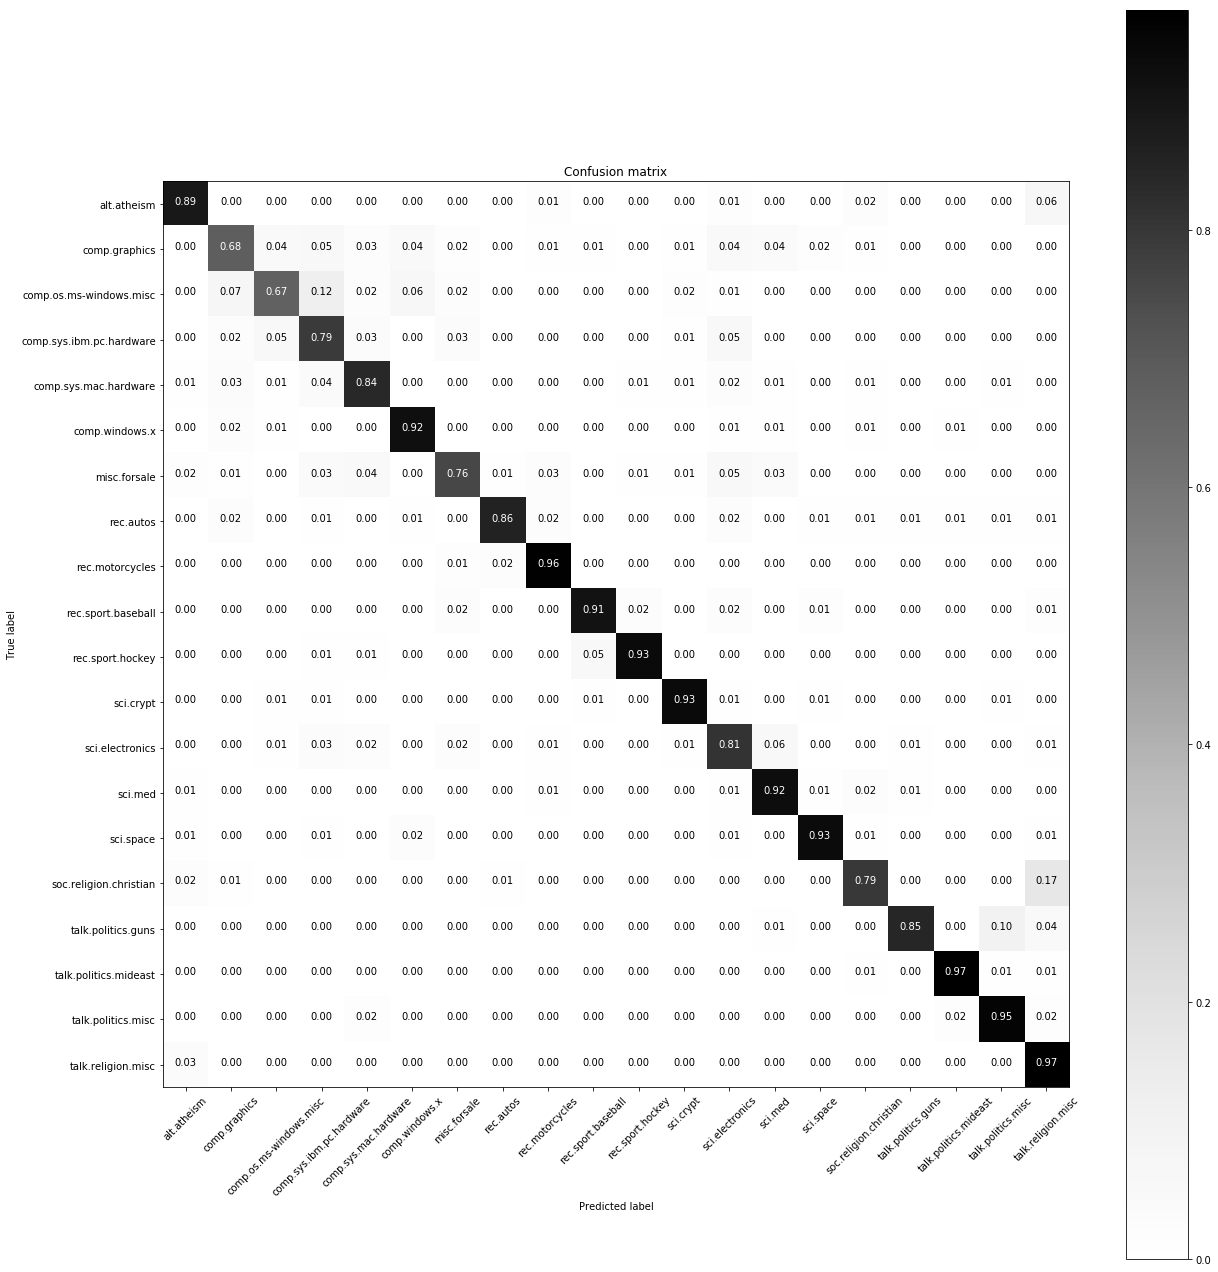

In [45]:
best_run = reduced_60000
y_pred = best_run.predict(X_val)
cm = confusion_matrix(y_pred, y_val)

plt.figure(figsize=(18,18))
plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greys);
plt.show()

We observe that there is confusion on similar subjets like **soc.religion.christian** with **talk.religion.misc**, **talk.politics.misc** with **talk.politics.guns** and so on. Which implies that most of our errors are on similar subject, we could thus either regroup those subjects or treat them differently to increase our accuracy.

## 2.2.4 Inspectation of "feature\_importances\_" attribute

We begin by setting back the right dimensions and fitting the model:

In [46]:
X_train, y_train, X_test, X_val, y_test, y_val = change_max_features_number(60000) # run if needed
best_run.estimator.fit(X_train, y_train)

/home/zampieri/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

In [47]:
print('Number of features:',best_run.estimator.n_features_)
print('Features importances:',best_run.estimator.feature_importances_)
print('Maximal importance of a feature:',max(best_run.estimator.feature_importances_))
print('Minimal importance of a feature:',min(best_run.estimator.feature_importances_))

Number of features: 60000
Features importances: [ 0.00059091  0.00030749  0.         ...,  0.          0.          0.        ]
Maximal importance of a feature: 0.00853132126599
Minimal importance of a feature: 0.0


We see that the max importance is of 0.8% and the minimal is 0%. But lets investigate further:

In [48]:
features_importance = pd.Series(list(best_run.estimator.feature_importances_))
features_importance.describe()

count    6.000000e+04
mean     1.666667e-05
std      1.210376e-04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.865221e-08
max      8.531321e-03
dtype: float64

We see that most of the features are 0 so we can filter them:

In [49]:
features_importance[features_importance!=0].describe()

count    1.516600e+04
mean     6.593696e-05
std      2.339078e-04
min      1.357509e-09
25%      9.156742e-06
50%      1.886477e-05
75%      4.508986e-05
max      8.531321e-03
dtype: float64

We see that "only" 15000 features have some importance, which is 25% of the original number of features. We could thus filter all the features that have no importance and keep only the important features.

## 2.3 Conclusion Q2

We have thus made the following remarks: 
* The number of features is very important, but one should take in consiferation that a lot of them will not be of any importance and some of only a very small importance and ignoring them would descrease the computational cost.
* The number of estimators is also of great importance but is slows down considerably the code. It should be manipulated with caution.
* The max_depth of the tree should not be too large, wiht the risk of increasing the overfit. This is what we expected from the theory!
* Keeping only the content of each text decrease the accuracy even though is is of greater interest since is is really the content that we would like to classify (headers are a kind of label already)
* Similar subject tends to be confused. Treating similar subjects with caution would likely increase accuracy!